# A logistic regressor

The simplest neural network is a logistic regressor. Logistic regression takes in values of any range but outputs only values between zero and one. There are many applications for logistic regressors. One example use case is to predict the likelihood of a homeowner to default on a mortgage. We might take all kinds of values into account to predict the likelihood of default, the debtor’s salary, whether she has a car, the security of her job, etc., but the likelihood will always be a value between zero and one. Even the worst debtor ever cannot have a default likelihood above 100% and the best cannot go below 0%.

We will use a library called numpy which enables easy and fast matrix operations in Python. To ensure we get the same result in all of our experiments, we have to set a random seed.

In [1]:
import numpy as np
np.random.seed(1)

In [2]:
#Since our dataset is quite small, we define it manually as numpy matrices

X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

y = np.array([[0,1,1,0]]).T

 To compute the output of the regressor, we must first do a linear step. We compute the dot product of the input X and the weights W. This is the same as multiplying each value of X with its weight and then taking the sum. To this number, we add the bias b. Afterwards, we do a nonlinear step. In the nonlinear step, we run the linear intermediate product z through an activation function, in this case, the sigmoid function. The sigmoid function squishes input values to outputs between zero and one.

In [3]:
# sigmoid activation function as a Python function.

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
W = 2*np.random.random((3,1)) - 1
b = 0

In [5]:
#Now that all variables are set, we can do the linear step:

z = X.dot(W) + b

In [6]:
#And the nonlinear step:

A = sigmoid(z)

In [7]:
print(A)

[[0.60841366]
 [0.45860596]
 [0.3262757 ]
 [0.36375058]]


This looks nothing like our desired output y at all! Clearly, our regressor is representing some function, but it is quite far away from the function we want. To better approximate our desired function, we have to tweak the weights W and the bias b to get better results.
 
In this case, our problem is a binary classification problem, so we will use the binary cross entropy loss: 

DBCE(y,y^)=−1N∑i=iN[yilog(y^i)+(1−yi)log(1−y^i)]

Let's go through this step by step.

DBCE(y,y^) is the distance function for binary cross entropy loss.

−1N∑Ni=1 The loss over a batch of N examples is the average loss of all examples.

yi∗logy^i This part of the loss only comes into play if the true value, yi is 1. If yi is 1, we want y^i to be as close to 1 as possible, to achieve a low loss.

 (1−yi)log(1−y^i) This part of the loss comes into play if yi is 0. If so, we want y^i to be close to 0 as well.

In Python this loss function is implemented as follows:

In [12]:
def bce_loss(y,y_hat):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
    return loss 

In [13]:
bce_loss(y,A)

0.8223225820877986

In [14]:
# Randomly initialize the weights
W = 2*np.random.random((3,1)) - 1
b = 0

# Set the learning rate alpha to 1
alpha = 1

# We will train for 20 epochs
epochs = 20

# Count the number of training examples we have (4)
N = y.shape[0]

In [15]:
#In the loop below we do multiple forward and backward passes and apply the gradient descent update rule.

losses = []
for i in range(epochs):
    # Do the linear step
    z = X.dot(W) + b
    
    # Do the non linear step
    A = sigmoid(z)
    
    # Calculate the loss
    loss = bce_loss(y,A)
    
    # Keep track of the loss
    print('Epoch:',i,'Loss:',loss)
    losses.append(loss)
    
    # Back propagate
    dz = (A - y)
    
    # ... calcualte loss derivative with respect to weights
    dW = 1/N * np.dot(X.T,dz)
    
    # ... calculate loss derivative with respect to bias
    db = 1/N * np.sum(dz,axis=0,keepdims=True)    
    
    # Update parameters
    W -= alpha * dW
    b -= alpha * db

Epoch: 0 Loss: 0.8907627075279007
Epoch: 1 Loss: 0.6927760160745733
Epoch: 2 Loss: 0.5898451770659854
Epoch: 3 Loss: 0.5280885451830415
Epoch: 4 Loss: 0.4820073214455976
Epoch: 5 Loss: 0.44368423755499686
Epoch: 6 Loss: 0.41060585370411384
Epoch: 7 Loss: 0.38165051378604337
Epoch: 8 Loss: 0.3561084424371502
Epoch: 9 Loss: 0.3334450250738084
Epoch: 10 Loss: 0.31323197922576923
Epoch: 11 Loss: 0.29511860660977185
Epoch: 12 Loss: 0.2788147565057779
Epoch: 13 Loss: 0.26407867672883883
Epoch: 14 Loss: 0.2507077275683651
Epoch: 15 Loss: 0.23853110552406673
Epoch: 16 Loss: 0.2274040783772286
Epoch: 17 Loss: 0.21720338508576542
Epoch: 18 Loss: 0.20782354315100746
Epoch: 19 Loss: 0.19917386778993895


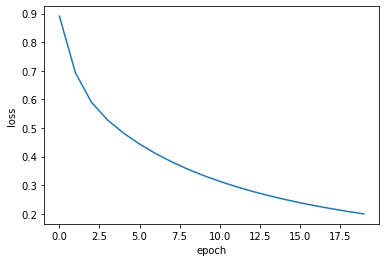

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
#fig.savefig('loss.jpg')

# A deeper network
We established earlier that in order to approximate more complex functions, we need bigger, deeper networks. Creating a deeper networks works by stacking layers on top of each other.

In this section we will build a 2 layer neural network

The input gets multiplied with the first set of weights W1, producing an intermediate product z1 and then run through an activation function to produce the first layers activations A1. These activations then get multiplied with a second layer of weights W2, producing an intermediate product z2 which gets run through a second activation function which produces the output A2 of our neural net.

In [17]:
# Package imports
# Matplotlib is a matlab like plotting library
import matplotlib
import matplotlib.pyplot as plt
# Numpy handles matrix operations
import numpy as np
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model


# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [18]:
# Just some helper functions we moved over from the last chapter
# sigmoid function
def sigmoid(x):
    '''
    Calculates the sigmoid activation of a given input x
    See: https://en.wikipedia.org/wiki/Sigmoid_function
    '''
    return 1/(1+np.exp(-x))

#Log Loss function
def bce_loss(y,y_hat):
    '''
    Calculates the logistic loss between a prediction y_hat and the labels y
    See: http://wiki.fast.ai/index.php/Log_Loss

    We need to clip values that get too close to zero to avoid zeroing out. 
    Zeroing out is when a number gets so small that the computer replaces it with 0.
    Therefore, we clip numbers to a minimum value.
    '''
    minval = 0.000000000001
    N = y.shape[0]
    l = -1/N * np.sum(y * np.log(y_hat.clip(min=minval)) + (1-y) * np.log((1-y_hat).clip(min=minval)))
    return l

# Log loss derivative
def bce_loss_derivative(y,y_hat):
    '''
    Calculates the gradient (derivative) of the log loss between point y and y_hat
    See: https://stats.stackexchange.com/questions/219241/gradient-for-logistic-loss-function
    '''
    return (y_hat-y)

In [19]:
def forward_prop(model,a0):
    '''
    Forward propagates through the model, stores results in cache.
    See: https://stats.stackexchange.com/questions/147954/neural-network-forward-propagation
    A0 is the activation at layer zero, it is the same as X
    '''
    
    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Linear step
    z1 = a0.dot(W1) + b1
    
    # First activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = sigmoid(z2)
    cache = {'a0':a0,'z1':z1,'a1':a1,'z1':z1,'a2':a2}
    return cache

In [20]:
def tanh_derivative(x):
    '''
    Calculates the derivative of the tanh function that is used as the first activation function
    See: https://socratic.org/questions/what-is-the-derivative-of-tanh-x
    '''
    return (1 - np.power(x, 2))

In [21]:
def backward_prop(model,cache,y):
    '''
    Backward propagates through the model to calculate gradients.
    Stores gradients in grads dictionary.
    See: https://en.wikipedia.org/wiki/Backpropagation
    '''
    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Load forward propagation results
    a0,a1, a2 = cache['a0'],cache['a1'],cache['a2']
    
    # Backpropagation
    # Calculate loss derivative with respect to output
    dz2 = bce_loss_derivative(y=y,y_hat=a2)
    
    # Calculate loss derivative with respect to second layer weights
    dW2 = (a1.T).dot(dz2)
    
    # Calculate loss derivative with respect to second layer bias
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    # Calculate loss derivative with respect to first layer
    dz1 = dz2.dot(W2.T) * tanh_derivative(a1)
    
    # Calculate loss derivative with respect to first layer weights
    dW1 = np.dot(a0.T, dz1)
    
    # Calculate loss derivative with respect to first layer bias
    db1 = np.sum(dz1, axis=0)
    
    # Store gradients
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [22]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)

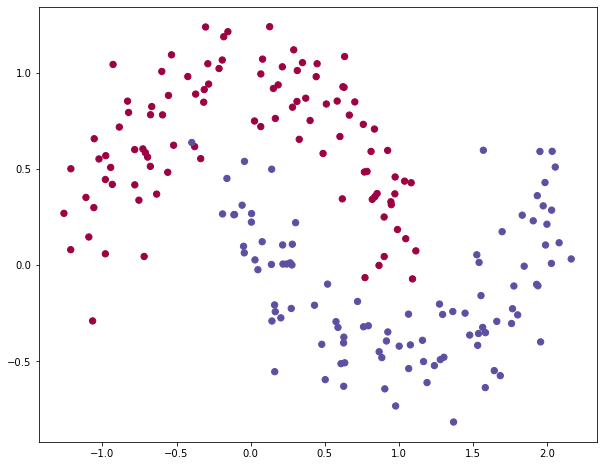

In [23]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)


In [24]:
def predict(model, x):
    '''
    Predicts y_hat as 1 or 0 for a given input X
    '''
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = c['a2']
    
    # Turn values to either 1 or 0
    y_hat[y_hat > 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat

In [25]:
def calc_accuracy(model,x,y):
    '''
    Calculates the accuracy of the model given an input x and a correct output y.
    The accuracy is the percentage of examples our model classified correctly
    '''
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100

In [26]:
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    '''
    Initializes weights with random number between -1 and 1
    Initializes bias with 0
    Assigns weights and parameters to model
    '''
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.randn(nn_hdim, nn_output_dim) - 1
    
    # Second layer bias
    b2 = np.zeros((1, nn_output_dim))
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [27]:
def update_parameters(model,grads,learning_rate):
    '''
    Updates parameters accoarding to gradient descent algorithm
    See: https://en.wikipedia.org/wiki/Gradient_descent
    '''
    # Load parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [28]:
def train(model,X_,y_,learning_rate, num_passes=20000, print_loss=False):
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            y_hat = cache['a2']
            print('Loss after iteration',i,':',bce_loss(y,y_hat))
            print('Accuracy after iteration',i,':',calc_accuracy(model,X_,y_),'%')
    
    return model

# Little noise and a good hidden size
In this section, we will fit a model with a good hidden layer size to data with little noise

In [29]:
# Hyper parameters
hiden_layer_size = 3
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

In [30]:
# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.7590872634269914
Accuracy after iteration 0 : 86.5 %
Loss after iteration 100 : 0.2574839032266012
Accuracy after iteration 100 : 87.5 %
Loss after iteration 200 : 0.23296065120384313
Accuracy after iteration 200 : 91.0 %
Loss after iteration 300 : 0.06607469435606936
Accuracy after iteration 300 : 98.5 %
Loss after iteration 400 : 0.03904889176738763
Accuracy after iteration 400 : 99.0 %
Loss after iteration 500 : 0.03162355657934104
Accuracy after iteration 500 : 99.5 %
Loss after iteration 600 : 0.02808346934457766
Accuracy after iteration 600 : 99.5 %
Loss after iteration 700 : 0.025967242193864887
Accuracy after iteration 700 : 99.5 %
Loss after iteration 800 : 0.02453302540660519
Accuracy after iteration 800 : 99.5 %
Loss after iteration 900 : 0.023480001190426873
Accuracy after iteration 900 : 99.5 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

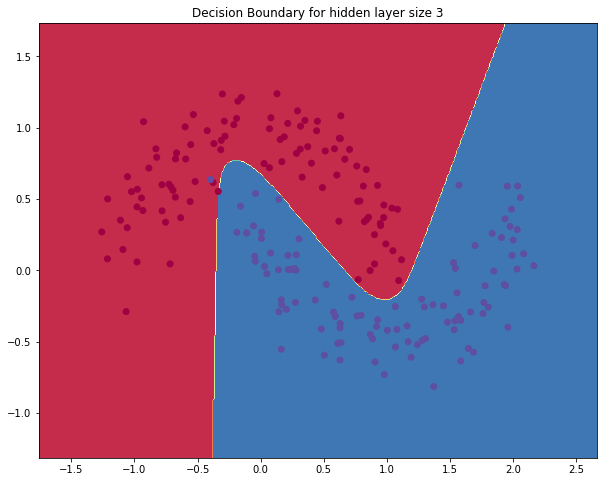

In [31]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 3")

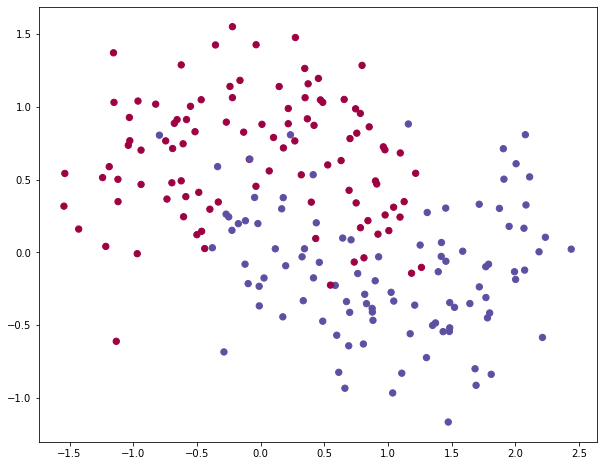

In [32]:
# Now with more noise
# Generate a dataset and plot it
np.random.seed(0)
# The data generator alows us to regulate the noise level
X, y = sklearn.datasets.make_moons(200, noise=0.3)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

# Too small hidden size

In this section, the hidden layer size is 1, which is too small. The data also has more noise.

In [33]:
# Hyper parameters
hiden_layer_size = 1
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.5961576235993598
Accuracy after iteration 0 : 68.5 %
Loss after iteration 100 : 0.3576338205351404
Accuracy after iteration 100 : 83.5 %
Loss after iteration 200 : 0.37700188869630924
Accuracy after iteration 200 : 83.5 %
Loss after iteration 300 : 0.3769594818049994
Accuracy after iteration 300 : 83.5 %
Loss after iteration 400 : 0.3769526507972909
Accuracy after iteration 400 : 83.5 %
Loss after iteration 500 : 0.37695128678554995
Accuracy after iteration 500 : 83.5 %
Loss after iteration 600 : 0.37695100261609
Accuracy after iteration 600 : 83.5 %
Loss after iteration 700 : 0.37695094286213987
Accuracy after iteration 700 : 83.5 %
Loss after iteration 800 : 0.3769509302725343
Accuracy after iteration 800 : 83.5 %
Loss after iteration 900 : 0.3769509276189161
Accuracy after iteration 900 : 83.5 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 1')

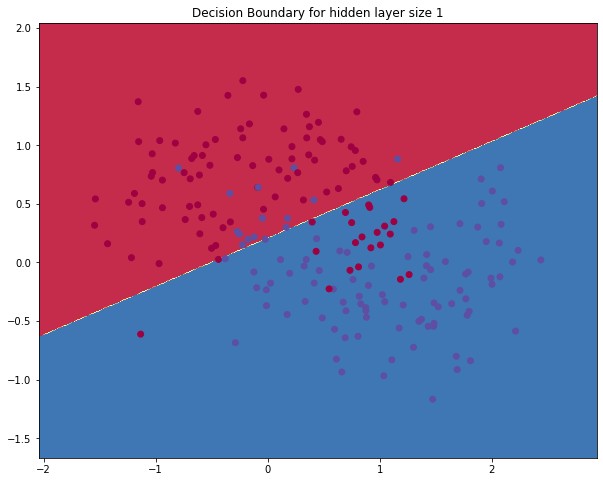

In [34]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 1")

# Too large hidden layer size

In this section, the hidden layer size is too large and the model fits the noise.

In [35]:
# Hyper parameters
hiden_layer_size = 500
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 13.066488880281316
Accuracy after iteration 0 : 60.5 %
Loss after iteration 100 : 3.7455580955798387
Accuracy after iteration 100 : 80.0 %
Loss after iteration 200 : 4.36756394176205
Accuracy after iteration 200 : 84.0 %
Loss after iteration 300 : 1.1284564826076326
Accuracy after iteration 300 : 91.0 %
Loss after iteration 400 : 0.5896507285895788
Accuracy after iteration 400 : 91.0 %
Loss after iteration 500 : 3.691561989840757
Accuracy after iteration 500 : 82.5 %
Loss after iteration 600 : 2.7783190419946697
Accuracy after iteration 600 : 85.0 %
Loss after iteration 700 : 0.7715273871293502
Accuracy after iteration 700 : 88.0 %
Loss after iteration 800 : 0.4390828253954074
Accuracy after iteration 800 : 88.5 %
Loss after iteration 900 : 0.5428458005908315
Accuracy after iteration 900 : 89.5 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 500')

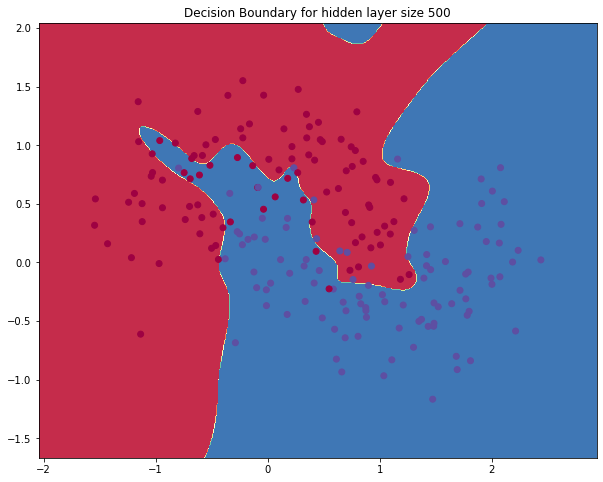

In [36]:
# Plot the decision boundary
# This might take a little while as our model is very big now
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 500")

# Keras

In this section we will build the same model with the Keras Sequential API

In [37]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)

In [43]:
from tensorflow.keras.layers import Dense, Activation

In [45]:
 
from tensorflow.keras.models import Sequential

# A two layer model in Keras

Building a neural network in the sequential API works as follows:

# Stacking layers

First, we create an empty sequential model with no layers:

   model = Sequential()

Then we can add layers to this model just like stacking a layer cake with model.add(). For the first layer, we have to specify the input dimensions of the layer. In our case, the data has two features, the coordinates of the point. We can add a hidden layer with hidden layer size 3 like this

 model.add(Dense(3,input_dim=2))

Note how we nest the functions: Inside model.add() we specify the Dense layer. The positional argument is the size of the layer. This Dense layer now only does the linear step. To add a tanh activation function, we call:

#model.add(Activation('tanh'))

We add the linear step and the activation function of the output layer in the same way:

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [46]:
model = Sequential()
model.add(Dense(3,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [47]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [49]:
# train the model
history = model.fit(X,y,epochs=900)

Epoch 1/900
7/7 [==============================] - 0s 855us/step - loss: 1.1502 - acc: 0.2050
Epoch 2/900
7/7 [==============================] - 0s 570us/step - loss: 1.1244 - acc: 0.2050
Epoch 3/900
7/7 [==============================] - 0s 570us/step - loss: 1.1000 - acc: 0.2100
Epoch 4/900
7/7 [==============================] - 0s 712us/step - loss: 1.0761 - acc: 0.2100
Epoch 5/900
7/7 [==============================] - 0s 712us/step - loss: 1.0541 - acc: 0.2050
Epoch 6/900
7/7 [==============================] - 0s 570us/step - loss: 1.0324 - acc: 0.2050
Epoch 7/900
7/7 [==============================] - 0s 712us/step - loss: 1.0108 - acc: 0.1950
Epoch 8/900
7/7 [==============================] - 0s 570us/step - loss: 0.9896 - acc: 0.1950
Epoch 9/900
7/7 [==============================] - 0s 570us/step - loss: 0.9700 - acc: 0.1900
Epoch 10/900
7/7 [==============================] - 0s 570us/step - loss: 0.9524 - acc: 0.1900
Epoch 11/900
7/7 [==============================] - 0s 570u

7/7 [==============================] - 0s 569us/step - loss: 0.4650 - acc: 0.8000
Epoch 88/900
7/7 [==============================] - 0s 569us/step - loss: 0.4628 - acc: 0.8050
Epoch 89/900
7/7 [==============================] - 0s 565us/step - loss: 0.4607 - acc: 0.8000
Epoch 90/900
7/7 [==============================] - 0s 712us/step - loss: 0.4584 - acc: 0.8000
Epoch 91/900
7/7 [==============================] - 0s 566us/step - loss: 0.4564 - acc: 0.8000
Epoch 92/900
7/7 [==============================] - 0s 712us/step - loss: 0.4544 - acc: 0.8000
Epoch 93/900
7/7 [==============================] - 0s 570us/step - loss: 0.4523 - acc: 0.8000
Epoch 94/900
7/7 [==============================] - 0s 855us/step - loss: 0.4504 - acc: 0.8000
Epoch 95/900
7/7 [==============================] - 0s 713us/step - loss: 0.4484 - acc: 0.8000
Epoch 96/900
7/7 [==============================] - 0s 712us/step - loss: 0.4464 - acc: 0.8000
Epoch 97/900
7/7 [==============================] - 0s 1ms/step

7/7 [==============================] - 0s 570us/step - loss: 0.3567 - acc: 0.8350
Epoch 173/900
7/7 [==============================] - 0s 570us/step - loss: 0.3559 - acc: 0.8350
Epoch 174/900
7/7 [==============================] - 0s 570us/step - loss: 0.3553 - acc: 0.8350
Epoch 175/900
7/7 [==============================] - 0s 713us/step - loss: 0.3546 - acc: 0.8350
Epoch 176/900
7/7 [==============================] - 0s 712us/step - loss: 0.3539 - acc: 0.8400
Epoch 177/900
7/7 [==============================] - 0s 569us/step - loss: 0.3532 - acc: 0.8350
Epoch 178/900
7/7 [==============================] - 0s 570us/step - loss: 0.3525 - acc: 0.8350
Epoch 179/900
7/7 [==============================] - 0s 570us/step - loss: 0.3519 - acc: 0.8350
Epoch 180/900
7/7 [==============================] - 0s 712us/step - loss: 0.3512 - acc: 0.8350
Epoch 181/900
7/7 [==============================] - 0s 712us/step - loss: 0.3506 - acc: 0.8350
Epoch 182/900
7/7 [==============================] - 0

7/7 [==============================] - 0s 717us/step - loss: 0.3163 - acc: 0.8650
Epoch 258/900
7/7 [==============================] - 0s 570us/step - loss: 0.3160 - acc: 0.8650
Epoch 259/900
7/7 [==============================] - 0s 713us/step - loss: 0.3156 - acc: 0.8650
Epoch 260/900
7/7 [==============================] - 0s 574us/step - loss: 0.3153 - acc: 0.8650
Epoch 261/900
7/7 [==============================] - 0s 570us/step - loss: 0.3150 - acc: 0.8650
Epoch 262/900
7/7 [==============================] - 0s 713us/step - loss: 0.3147 - acc: 0.8650
Epoch 263/900
7/7 [==============================] - 0s 712us/step - loss: 0.3143 - acc: 0.8650
Epoch 264/900
7/7 [==============================] - 0s 712us/step - loss: 0.3141 - acc: 0.8650
Epoch 265/900
7/7 [==============================] - 0s 574us/step - loss: 0.3138 - acc: 0.8600
Epoch 266/900
7/7 [==============================] - 0s 570us/step - loss: 0.3136 - acc: 0.8650
Epoch 267/900
7/7 [==============================] - 0

7/7 [==============================] - 0s 570us/step - loss: 0.2988 - acc: 0.8750
Epoch 343/900
7/7 [==============================] - 0s 713us/step - loss: 0.2987 - acc: 0.8750
Epoch 344/900
7/7 [==============================] - 0s 712us/step - loss: 0.2986 - acc: 0.8750
Epoch 345/900
7/7 [==============================] - 0s 855us/step - loss: 0.2984 - acc: 0.8750
Epoch 346/900
7/7 [==============================] - 0s 709us/step - loss: 0.2983 - acc: 0.8750
Epoch 347/900
7/7 [==============================] - 0s 570us/step - loss: 0.2982 - acc: 0.8800
Epoch 348/900
7/7 [==============================] - 0s 712us/step - loss: 0.2981 - acc: 0.8800
Epoch 349/900
7/7 [==============================] - 0s 570us/step - loss: 0.2980 - acc: 0.8800
Epoch 350/900
7/7 [==============================] - 0s 712us/step - loss: 0.2978 - acc: 0.8800
Epoch 351/900
7/7 [==============================] - 0s 570us/step - loss: 0.2976 - acc: 0.8800
Epoch 352/900
7/7 [==============================] - 0

7/7 [==============================] - 0s 713us/step - loss: 0.2914 - acc: 0.8850
Epoch 428/900
7/7 [==============================] - 0s 722us/step - loss: 0.2913 - acc: 0.8850
Epoch 429/900
7/7 [==============================] - 0s 712us/step - loss: 0.2913 - acc: 0.8850
Epoch 430/900
7/7 [==============================] - 0s 712us/step - loss: 0.2911 - acc: 0.8850
Epoch 431/900
7/7 [==============================] - 0s 712us/step - loss: 0.2911 - acc: 0.8850
Epoch 432/900
7/7 [==============================] - 0s 431us/step - loss: 0.2912 - acc: 0.8850
Epoch 433/900
7/7 [==============================] - 0s 712us/step - loss: 0.2910 - acc: 0.8850
Epoch 434/900
7/7 [==============================] - 0s 574us/step - loss: 0.2910 - acc: 0.8850
Epoch 435/900
7/7 [==============================] - 0s 712us/step - loss: 0.2909 - acc: 0.8850
Epoch 436/900
7/7 [==============================] - 0s 708us/step - loss: 0.2910 - acc: 0.8850
Epoch 437/900
7/7 [==============================] - 0

7/7 [==============================] - 0s 713us/step - loss: 0.2883 - acc: 0.8800
Epoch 513/900
7/7 [==============================] - 0s 570us/step - loss: 0.2883 - acc: 0.8850
Epoch 514/900
7/7 [==============================] - 0s 712us/step - loss: 0.2882 - acc: 0.8850
Epoch 515/900
7/7 [==============================] - 0s 712us/step - loss: 0.2883 - acc: 0.8800
Epoch 516/900
7/7 [==============================] - 0s 712us/step - loss: 0.2882 - acc: 0.8800
Epoch 517/900
7/7 [==============================] - 0s 567us/step - loss: 0.2882 - acc: 0.8800
Epoch 518/900
7/7 [==============================] - 0s 570us/step - loss: 0.2881 - acc: 0.8800
Epoch 519/900
7/7 [==============================] - 0s 570us/step - loss: 0.2881 - acc: 0.8800
Epoch 520/900
7/7 [==============================] - 0s 712us/step - loss: 0.2880 - acc: 0.8800
Epoch 521/900
7/7 [==============================] - 0s 573us/step - loss: 0.2881 - acc: 0.8800
Epoch 522/900
7/7 [==============================] - 0

7/7 [==============================] - 0s 713us/step - loss: 0.2865 - acc: 0.8900
Epoch 598/900
7/7 [==============================] - 0s 570us/step - loss: 0.2865 - acc: 0.8850
Epoch 599/900
7/7 [==============================] - 0s 712us/step - loss: 0.2865 - acc: 0.8900
Epoch 600/900
7/7 [==============================] - ETA: 0s - loss: 0.3758 - acc: 0.843 - 0s 708us/step - loss: 0.2865 - acc: 0.8900
Epoch 601/900
7/7 [==============================] - 0s 712us/step - loss: 0.2865 - acc: 0.8900
Epoch 602/900
7/7 [==============================] - 0s 712us/step - loss: 0.2863 - acc: 0.8900
Epoch 603/900
7/7 [==============================] - 0s 570us/step - loss: 0.2863 - acc: 0.8900
Epoch 604/900
7/7 [==============================] - 0s 713us/step - loss: 0.2864 - acc: 0.8900
Epoch 605/900
7/7 [==============================] - 0s 570us/step - loss: 0.2865 - acc: 0.8900
Epoch 606/900
7/7 [==============================] - 0s 716us/step - loss: 0.2862 - acc: 0.8850
Epoch 607/900
7/

7/7 [==============================] - 0s 570us/step - loss: 0.2853 - acc: 0.8800
Epoch 683/900
7/7 [==============================] - 0s 570us/step - loss: 0.2855 - acc: 0.8800
Epoch 684/900
7/7 [==============================] - 0s 712us/step - loss: 0.2855 - acc: 0.8800
Epoch 685/900
7/7 [==============================] - 0s 570us/step - loss: 0.2853 - acc: 0.8800
Epoch 686/900
7/7 [==============================] - 0s 712us/step - loss: 0.2854 - acc: 0.8800
Epoch 687/900
7/7 [==============================] - 0s 712us/step - loss: 0.2853 - acc: 0.8800
Epoch 688/900
7/7 [==============================] - 0s 712us/step - loss: 0.2852 - acc: 0.8800
Epoch 689/900
7/7 [==============================] - 0s 712us/step - loss: 0.2855 - acc: 0.8800
Epoch 690/900
7/7 [==============================] - 0s 570us/step - loss: 0.2852 - acc: 0.8800
Epoch 691/900
7/7 [==============================] - 0s 713us/step - loss: 0.2853 - acc: 0.8800
Epoch 692/900
7/7 [==============================] - 0

7/7 [==============================] - 0s 570us/step - loss: 0.2845 - acc: 0.8900
Epoch 768/900
7/7 [==============================] - 0s 570us/step - loss: 0.2844 - acc: 0.8900
Epoch 769/900
7/7 [==============================] - 0s 712us/step - loss: 0.2845 - acc: 0.8900
Epoch 770/900
7/7 [==============================] - 0s 707us/step - loss: 0.2845 - acc: 0.8850
Epoch 771/900
7/7 [==============================] - 0s 570us/step - loss: 0.2845 - acc: 0.8900
Epoch 772/900
7/7 [==============================] - 0s 574us/step - loss: 0.2844 - acc: 0.8900
Epoch 773/900
7/7 [==============================] - 0s 571us/step - loss: 0.2844 - acc: 0.8850
Epoch 774/900
7/7 [==============================] - 0s 713us/step - loss: 0.2844 - acc: 0.8850
Epoch 775/900
7/7 [==============================] - 0s 570us/step - loss: 0.2843 - acc: 0.8850
Epoch 776/900
7/7 [==============================] - 0s 712us/step - loss: 0.2843 - acc: 0.8850
Epoch 777/900
7/7 [==============================] - 0

7/7 [==============================] - 0s 997us/step - loss: 0.2837 - acc: 0.8800
Epoch 852/900
7/7 [==============================] - 0s 997us/step - loss: 0.2836 - acc: 0.8850
Epoch 853/900
7/7 [==============================] - 0s 570us/step - loss: 0.2837 - acc: 0.8800
Epoch 854/900
7/7 [==============================] - 0s 571us/step - loss: 0.2838 - acc: 0.8850
Epoch 855/900
7/7 [==============================] - 0s 746us/step - loss: 0.2836 - acc: 0.8850
Epoch 856/900
7/7 [==============================] - 0s 709us/step - loss: 0.2836 - acc: 0.8850
Epoch 857/900
7/7 [==============================] - 0s 712us/step - loss: 0.2836 - acc: 0.8850
Epoch 858/900
7/7 [==============================] - 0s 570us/step - loss: 0.2837 - acc: 0.8850
Epoch 859/900
7/7 [==============================] - 0s 851us/step - loss: 0.2836 - acc: 0.8850
Epoch 860/900
7/7 [==============================] - 0s 570us/step - loss: 0.2836 - acc: 0.8850
Epoch 861/900
7/7 [==============================] - 0